# Анализ предпочтений клиентов авиакомпании

Требуется изучить базу данных с полетами и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

---
Файлы, в которых содержатся результаты SQL запросов:

**query_1.csv** — результат запроса:

```
SELECT 
    aircrafts.model,
    COUNT(flights.flight_id) AS flights_amount,
    EXTRACT('year' FROM flights.departure_time :: timestamp) as year,
    EXTRACT('month' FROM flights.departure_time :: timestamp) as month    
FROM 
    flights 
    INNER JOIN aircrafts ON flights.aircraft_code = aircrafts.aircraft_code
WHERE   
    year = 2018 AND month = 09    
GROUP BY
    aircrafts.model
```

В нём содержится информация о количестве рейсов для каждой модели самолета в сентябре 2018 года.

---
**query_3.csv**: 

```
SELECT
    subq.city,
    AVG(subq.flights_per_day) AS average_flights
FROM
    (SELECT
        COUNT(flights.arrival_airport) AS flights_per_day,
        airports.city,
        EXTRACT(DAY FROM arrival_time) AS day
    FROM
        flights
        INNER JOIN airports ON airports.airport_code=flights.arrival_airport
    WHERE
        EXTRACT(MONTH FROM arrival_time)='09'
    GROUP BY
        airports.city,
        EXTRACT(DAY FROM arrival_time)) AS subq
            
GROUP BY
    subq.city
```

В нём содержится среднее количество рейсов, прибывающих в разные города в сентябре 2018 года.


# Аналитика

In [1]:
#импортирование нужных библиотек:
import pandas as pd

#визуализация
import matplotlib.pyplot as plt

#игнорирование предупреждений
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    planes = pd.read_csv('/datasets/query_1.csv')
    cities = pd.read_csv('/datasets/query_3.csv')
except:
    planes = pd.read_csv('datasets/query_1.csv')
    cities = pd.read_csv('datasets/query_3.csv')

In [3]:
def examine_df(df):
    display(df.head(10))
    display(df.info())
    display(df.describe())
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.style.format('{:.1f}', subset='Percent')
    
    print(f'Количество пропусков {missing_data}')    
    print(f'Количество дубликатов : {df.duplicated().sum()} или {df.duplicated().sum() / df.shape[0]:.1%}')
    print('_____________________________________________')

In [4]:
examine_df(planes)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Количество пропусков                 Total  Percent
flights_amount      0      0.0
model               0      0.0
Количество дубликатов : 0 или 0.0%
_____________________________________________


In [5]:
examine_df(cities)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Количество пропусков                  Total  Percent
average_flights      0      0.0
city                 0      0.0
Количество дубликатов : 0 или 0.0%
_____________________________________________


In [6]:
cities['average_flights'] = cities['average_flights'].astype('int')
display(cities.head())

,city,average_flights
0,Абакан,3
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2


Данные импортировали и изучили, полет нормальный. Среднее количество рейсов по городам привели к целому типу.

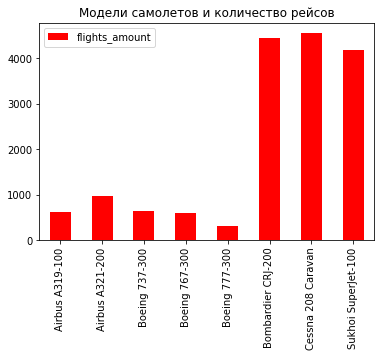

In [7]:
ax = planes.plot(title='Модели самолетов и количество рейсов', kind= 'bar',  color='r')
ax.set_xticklabels(planes.model)
plt.show()

Самые "летающие" модели самолетов: Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet. Летают более чем в 4 раза чаще, чем другие модели.

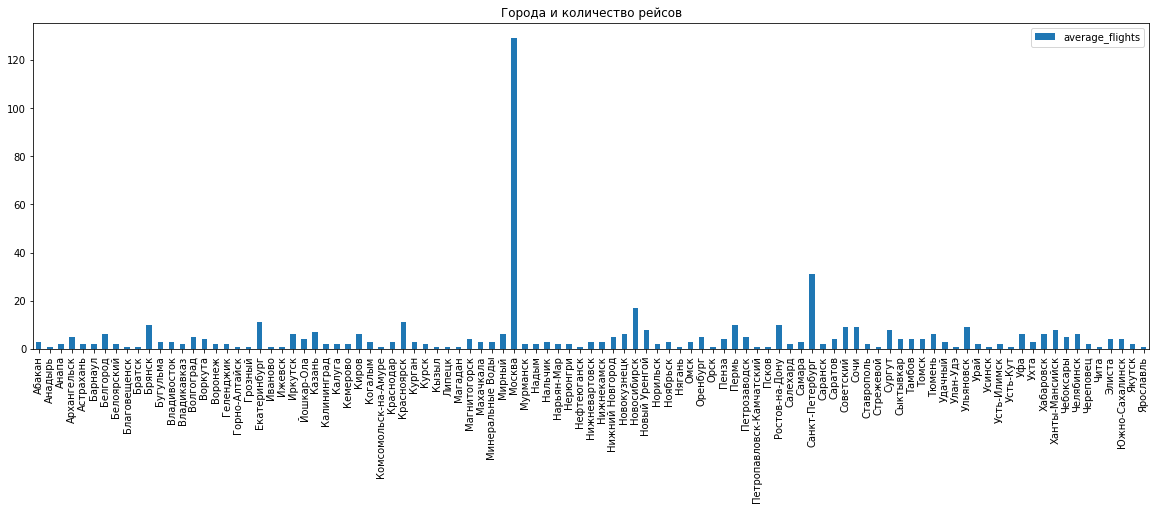

In [8]:
ax = cities.plot(title='Города и количество рейсов', kind= 'bar', figsize=(20,6))
ax.set_xticklabels(cities.city)
plt.show()

Неудивительно, летают чаще всего в Москву и Санкт-Петербург.

In [9]:
top10 = cities.sort_values(by='average_flights', ascending=False)[:10]

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


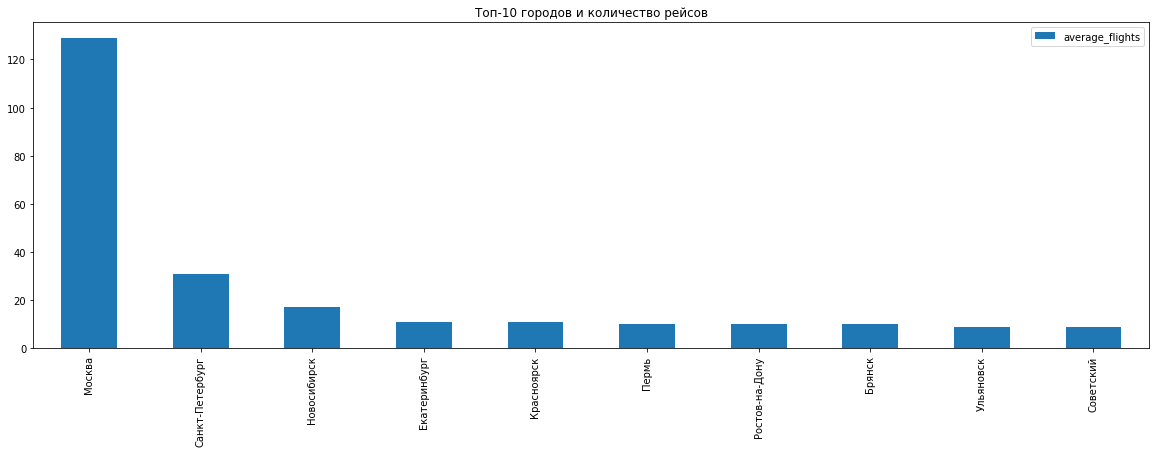

In [10]:
display(top10)
ax = top10.plot(title='Топ-10 городов и количество рейсов', kind= 'bar', figsize=(20,6))
ax.set_xticklabels(top10.city)
plt.show()

Абсолютный лидер по полетам - Москва, в 4 раза больше полетов чем в Санкт-Петербург. Вроде логично - чем больше население города, тем больше полетов. Удивили позиции Ульяновска, Брянска и Советского. Проверила в таблицах, в сентябре 2018 фестивали там не проводились. Видимо, проводилось что-то другое.


# Общий вывод

Данные,выгруженные из датабазы посредством SQL запросов, были загружены для обработки в python. Типы данных были приведены к корректным. Были изучены количество рейсов для разных моделей самолетов и среднее количество рейсов по городам. Самые популярные города - самые крупные.